In [97]:
import xarray as x
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

import FaIR data

In [5]:
ds_fair=xr.open_dataset('SCM_data/timeseries/flat10_FaIR.nc')

import MAGICC data

In [8]:
ds_magicc=xr.open_dataset('SCM_data/timeseries/flat10_magicc.nc')

In [117]:
def plot_range(SampleData,ax1,col='steelblue'):
 prctl=[5,25,50,75,95]
 SDist=np.percentile(SampleData,prctl,axis=1).T

 x=np.arange(0,len(pd.DatetimeIndex(SampleData.time).year))
 #ax1.plot(x, SDist[:,2],)
 for i in range(3):
     alph=0.15+(i/len(prctl))
     ax1.fill_between(x,SDist[:,0+i], SDist[:,4-i], color=col, alpha=alph)
 return sDist

(0.0, 320.0)

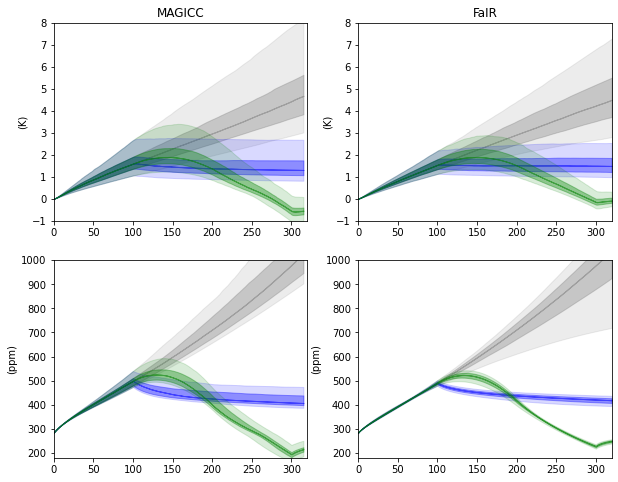

In [135]:
fig = plt.figure(figsize=[10,8])

ax1 = fig.add_subplot(2,2,1)

plot_range(ds_magicc.Surface_Air_Temperature_Change.sel(scenario='flat10').T,ax1,col='grey')
plot_range(ds_magicc.Surface_Air_Temperature_Change.sel(scenario='flat10_zec').T,ax1,col='blue')
plot_range(ds_magicc.Surface_Air_Temperature_Change.sel(scenario='flat10_cdr').T,ax1,col='green')
ax1.set_title('MAGICC')
ax1.set_ylabel('(K)')
ax1.set_ylim([-1,8])
ax1.set_xlim([0,320])


ax2 = fig.add_subplot(2,2,2)

plot_range(ds_fair.temperature.sel(scenario='esm-flat10'),ax2,col='grey')
plot_range(ds_fair.temperature.sel(scenario='esm-flat10_zec'),ax2,col='blue')
plot_range(ds_fair.temperature.sel(scenario='esm-flat10_cdr'),ax2,col='green')
ax2.set_title('FaIR')
ax2.set_ylabel('(K)')
ax2.set_ylim([-1,8])
ax2.set_xlim([0,320])

ax3 = fig.add_subplot(2,2,3)

plot_range(ds_magicc.Atmospheric_Concentrations__CO2.sel(scenario='flat10').T,ax3,col='grey')
plot_range(ds_magicc.Atmospheric_Concentrations__CO2.sel(scenario='flat10_zec').T,ax3,col='blue')
plot_range(ds_magicc.Atmospheric_Concentrations__CO2.sel(scenario='flat10_cdr').T,ax3,col='green')
ax3.set_ylabel('(ppm)')
ax3.set_ylim([180,1000])
ax3.set_xlim([0,320])

ax4 = fig.add_subplot(2,2,4)

plot_range(ds_fair.co2_concentration.sel(scenario='esm-flat10'),ax4,col='grey')
plot_range(ds_fair.co2_concentration.sel(scenario='esm-flat10_zec'),ax4,col='blue')
plot_range(ds_fair.co2_concentration.sel(scenario='esm-flat10_cdr'),ax4,col='green')
ax4.set_ylabel('(ppm)')
ax4.set_ylim([180,1000])
ax4.set_xlim([0,320])





In [142]:
e_flat10=pd.read_csv('flat10.csv',header=4)
e_flat10_cdr=pd.read_csv('flat10_cdr.csv',header=4)
e_flat10_zec=pd.read_csv('flat10_zec.csv',header=4)


In [189]:
def extd(ts,leng):
    out=np.zeros(leng)
    if leng>len(ts):
        out[:len(ts)]=ts.values
        out[len(ts):]=ts.iloc[-1]
    else:
        out=ts[:leng]
    return out

In [165]:
e_flat10['Emission Rate (PgC a-1)']

0      10.0
1      10.0
2      10.0
3      10.0
4      10.0
       ... 
145    10.0
146    10.0
147    10.0
148    10.0
149    10.0
Name: Emission Rate (PgC a-1), Length: 150, dtype: float64

0

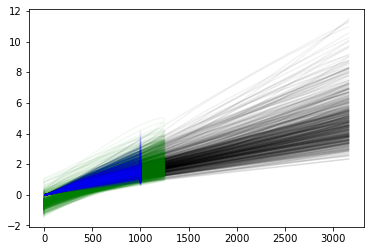

In [191]:
ce_fl10=np.cumsum(extd(e_flat10['Emission Rate (PgC a-1)'],len(ds_magicc.sel(scenario='flat10').time)))
ce_fl10_cdr=np.cumsum(extd(e_flat10_cdr['Emission Rate (PgC a-1)'],len(ds_magicc.sel(scenario='flat10_cdr').time)))
ce_fl10_zec=np.cumsum(extd(e_flat10_zec['Emission Rate (PgC a-1)'],len(ds_magicc.sel(scenario='flat10_zec').time)))


plt.plot(ce_fl10,ds_magicc.Surface_Air_Temperature_Change.sel(scenario='flat10').T,color='k',alpha=0.05)
plt.plot(ce_fl10_cdr,ds_magicc.Surface_Air_Temperature_Change.sel(scenario='flat10_cdr').T,color='g',alpha=0.05)
plt.plot(ce_fl10_zec,ds_magicc.Surface_Air_Temperature_Change.sel(scenario='flat10_zec').T,color='b',alpha=0.05)


0

(-1.0, 1.0)

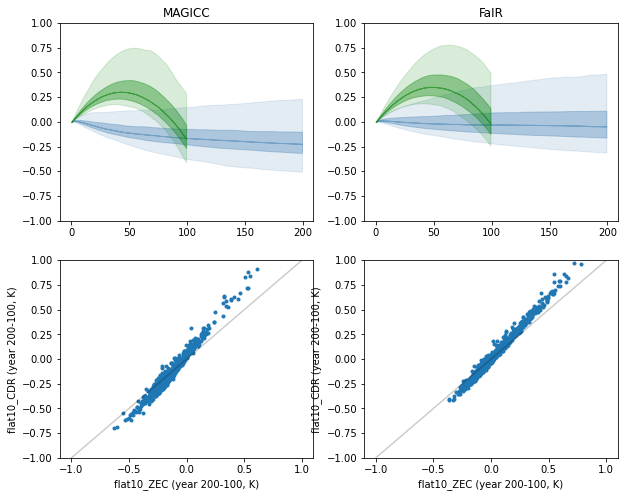

In [256]:
fig = plt.figure(figsize=[10,8])

m_100=ds_magicc.Surface_Air_Temperature_Change.sel(scenario='flat10_zec').isel(time=100).T
m_100pl=ds_magicc.Surface_Air_Temperature_Change.sel(scenario='flat10_zec').isel(time=slice(100,300)).T
m_100plc=ds_magicc.Surface_Air_Temperature_Change.sel(scenario='flat10_cdr').isel(time=slice(100,200)).T

ax1 = fig.add_subplot(2,2,1)
ax1.set_ylim([-1,1])
ax1.set_title('MAGICC')
plot_range(m_100pl-m_100,ax1)
plot_range(m_100plc-m_100,ax1,'g')

t_100=ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
t_100pl=ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300))
t_100plc=ds_fair.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,200))

ax2 = fig.add_subplot(2,2,2)
ax2.set_ylim([-1,1])
ax2.set_title('FaIR')

plot_range(t_100pl-t_100,ax2)
plot_range(t_100plc-t_100,ax2,'g')

ax3 = fig.add_subplot(2,2,3)

ax3.plot(ds_magicc.Surface_Air_Temperature_Change.sel(scenario='flat10_zec').isel(time=200).T-m_100,ds_magicc.Surface_Air_Temperature_Change.sel(scenario='flat10_cdr').isel(time=200).T-m_100,'.')
ax3.plot([-1,1],[-1,1],'k-',alpha=0.2)
ax3.set_xlabel('flat10_ZEC (year 200-100, K)')
ax3.set_ylabel('flat10_CDR (year 200-100, K)')
ax3.set_ylim([-1,1])

ax4 = fig.add_subplot(2,2,4)

ax4.plot(ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=200).T-t_100,ds_fair.temperature.sel(scenario='esm-flat10_cdr').isel(time=200).T-t_100,'.')
ax4.plot([-1,1],[-1,1],'k-',alpha=0.2)
ax4.set_xlabel('flat10_ZEC (year 200-100, K)')
ax4.set_ylabel('flat10_CDR (year 200-100, K)')
ax4.set_ylim([-1,1])


In [240]:
fair_metrics=pd.read_csv('SCM_data/metrics/FaIR_metrics.csv',index_col=0)

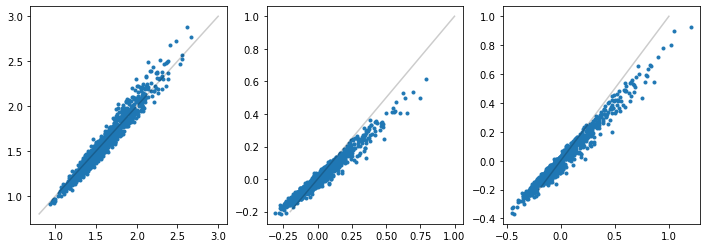

In [277]:
fig = plt.figure(figsize=[12,4])

t_100=ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
ax1 = fig.add_subplot(1,3,1)

ax1.plot(fair_metrics['tcre'],t_100,'.')
ax1.plot([0.8,3],[.8,3],'k-',alpha=0.2)

ax2 = fig.add_subplot(1,3,2)

z50=ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=150)-ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=100)

ax2.plot(fair_metrics['zec50'],ds_fair.zec50,'.')
ax2.plot([-.2,1],[-.2,1],'k-',alpha=0.2)
ax3 = fig.add_subplot(1,3,3)

z100=ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=200)-ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=100)

ax3.plot(fair_metrics['zec100'],ds_fair.zec100,'.')
ax3.plot([-.2,1],[-.2,1],'k-',alpha=0.2)
